In [30]:
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns

Let's look at some simple examples of aggregation.

In [31]:
# aggregaton on series returns single value
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
display(ser)
print(f"\nseries sum: {ser.sum()}")
print(f"series mean: {ser.mean()}")
print(f"number of items in series: {ser.count()}")

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64


series sum: 2.811925491708157
series mean: 0.5623850983416314
number of items in series: 5


In [32]:
# for a dataframe you, by default, get a value for each column, this can be altered
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
display(df)
print(f"\ndataframe sum:\n{df.sum()}")
print(f"\ndataframe mean:\n{df.mean()}")
print(f"\nnumber of items in columns:\n{df.count()}")

A         B
0  0.155995  0.020584
1  0.058084  0.969910
2  0.866176  0.832443
3  0.601115  0.212339
4  0.708073  0.181825


dataframe sum:
A    2.389442
B    2.217101
dtype: float64

dataframe mean:
A    0.477888
B    0.443420
dtype: float64

number of items in columns:
A    5
B    5
dtype: int64


In [33]:
# but we can get it to operate on the rows by specifying an axis
print(f"\ndataframe sum by row:\n{df.sum(axis='columns')}")
print(f"\ndataframe mean by row:\n{df.mean(axis='columns')}")



dataframe sum by row:
0    0.176579
1    1.027993
2    1.698619
3    0.813454
4    0.889898
dtype: float64

dataframe mean by row:
0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64


In [34]:
# Let's try a more complicated dataset: Titanic
titan = pd.read_csv('./data/titanic/train.csv')
display(titan.head(5))

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [35]:
# Let's try that describe() method
display(titan.describe())
print()
display(titan.dropna().describe())

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200

In [36]:
by_sex = titan.groupby("Sex")
display(by_sex.describe())
display(by_sex['Survived'].describe())
display(by_sex[['Survived', 'Fare', 'SibSp', 'Parch']].mean())

PassengerId                                                             \
             count        mean         std  min     25%    50%     75%    max   
Sex                                                                             
female       314.0  431.028662  256.846324  2.0  231.75  414.5  641.25  889.0   
male         577.0  454.147314  257.486139  1.0  222.00  464.0  680.00  891.0   

       Survived            ... Parch        Fare                              \
          count      mean  ...   75%  max  count       mean        std   min   
Sex                        ...                                                 
female    314.0  0.742038  ...   1.0  6.0  314.0  44.479818  57.997698  6.75   
male      577.0  0.188908  ...   0.0  5.0  577.0  25.523893  43.138263  0.00   

                                          
              25%   50%    75%       max  
Sex                                       
female  12.071875  23.0  55.00  512.3292  
male     7.895800  10.5  26.55  512.3292  

[2 rows x 56 columns]

count      mean       std  min  25%  50%  75%  max
Sex                                                       
female  314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male    577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

Survived       Fare     SibSp     Parch
Sex                                            
female  0.742038  44.479818  0.694268  0.649682
male    0.188908  25.523893  0.429809  0.235702

In [37]:
display(titan.groupby("Sex")["Survived"].count())

Sex
female    314
male      577
Name: Survived, dtype: int64

In [38]:
display(titan.groupby(["Sex", "Age"])["Survived"].count())

Sex     Age  
female  0.75     2
        1.00     2
        2.00     6
        3.00     2
        4.00     5
                ..
male    70.00    2
        70.50    1
        71.00    2
        74.00    1
        80.00    1
Name: Survived, Length: 145, dtype: int64

In [39]:
# Let's look at missing data
display(titan.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# Ok let's just sort out missing embarked first
display(titan.loc[titan['Embarked'].isnull()])
# searching suitable sources, turns out both embarked at Southhampton
# https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
# https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html
titan.loc[titan['Embarked'].isnull(), 'Embarked'] = 'S'

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [41]:
# Age is a bit harder, but I am going to use the median age of the data grouped on sex and passenger class
print('Median age:')
display(titan.groupby(['Pclass', 'Sex'])['Age'].median())
print('\nCount by group:')
display(titan.groupby(['Pclass', 'Sex'])['Age'].count())
# let's fill the missing values
titan['Age'] = titan.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
print()
display(titan.isnull().sum())

Median age:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


Count by group:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

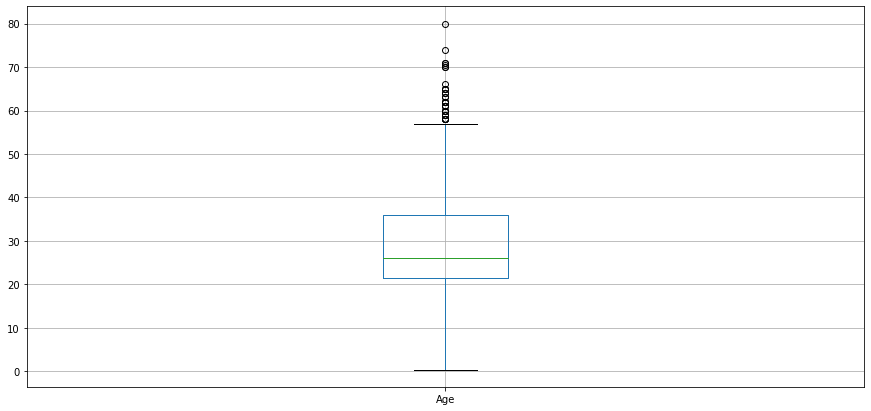

In [42]:
# we still need to do some work with Age and Fare
# I propose we create some more meaningful groups to more easily visualize possibilities
titan.boxplot(column=['Age'], figsize=(15,7))

In [43]:
# fair number of outliers, similar story for Fare
# so let's cut our data into blocks so the outliers are less of an issue
print(type(titan['Age'][0]))
# ~! rerunning this cell caused errors,
# so had to put the 'cut's in a suitable conditional
if type(titan['Age'][0]) == np.float64:
    titan['Age'] = pd.cut(titan['Age'].astype(int), 5)
    titan['Fare'] = pd.qcut(titan['Fare'], 5)
print(type(titan['Age'][0]))
print("for age, each category has a different number of cases")
print("but each category is of a similar range")
display(titan['Age'].value_counts())
print("for fare, each category has almost the same number of cases")
display(titan['Fare'].value_counts())

<class 'numpy.float64'>
<class 'pandas._libs.interval.Interval'>
for age, each category has a different number of cases
but each category is of a similar range


(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age, dtype: int64

for fare, each category has almost the same number of cases


(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [44]:
# don't need to display all that data, and going to drop Cabin for now
#data = titan[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
#display(data.head(5))

In [45]:
display(titan.groupby(["Sex"])["Survived"].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [46]:
display(titan.groupby(["Sex", "Age"])["Survived"].mean())

Sex     Age          
female  (-0.08, 16.0]    0.673469
        (16.0, 32.0]     0.703030
        (32.0, 48.0]     0.815789
        (48.0, 64.0]     0.916667
        (64.0, 80.0]          NaN
male    (-0.08, 16.0]    0.431373
        (16.0, 32.0]     0.154545
        (32.0, 48.0]     0.192857
        (48.0, 64.0]     0.177778
        (64.0, 80.0]     0.090909
Name: Survived, dtype: float64

In [47]:
display(titan.groupby(["Sex", "Age", "Pclass"])["Survived"].mean())

Sex     Age            Pclass
female  (-0.08, 16.0]  1         0.833333
                       2         1.000000
                       3         0.545455
        (16.0, 32.0]   1         0.968750
                       2         0.923077
                       3         0.521277
        (32.0, 48.0]   1         1.000000
                       2         0.904762
                       3         0.250000
        (48.0, 64.0]   1         0.941176
                       2         0.833333
                       3         1.000000
        (64.0, 80.0]   1              NaN
                       2              NaN
                       3              NaN
male    (-0.08, 16.0]  1         1.000000
                       2         0.818182
                       3         0.270270
        (16.0, 32.0]   1         0.444444
                       2         0.086207
                       3         0.138776
        (32.0, 48.0]   1         0.366667
                       2         0.076923
    

In [48]:
# not very tidy looking that, so let's see if we can improve the display format (shape)
display(titan.groupby(["Sex", "Age", "Pclass"])["Survived"].mean().unstack())

Pclass                       1         2         3
Sex    Age                                        
female (-0.08, 16.0]  0.833333  1.000000  0.545455
       (16.0, 32.0]   0.968750  0.923077  0.521277
       (32.0, 48.0]   1.000000  0.904762  0.250000
       (48.0, 64.0]   0.941176  0.833333  1.000000
       (64.0, 80.0]        NaN       NaN       NaN
male   (-0.08, 16.0]  1.000000  0.818182  0.270270
       (16.0, 32.0]   0.444444  0.086207  0.138776
       (32.0, 48.0]   0.366667  0.076923  0.055556
       (48.0, 64.0]   0.269231  0.090909  0.000000
       (64.0, 80.0]   0.166667  0.000000  0.000000

<AxesSubplot:xlabel='Sex,Age,Pclass'>

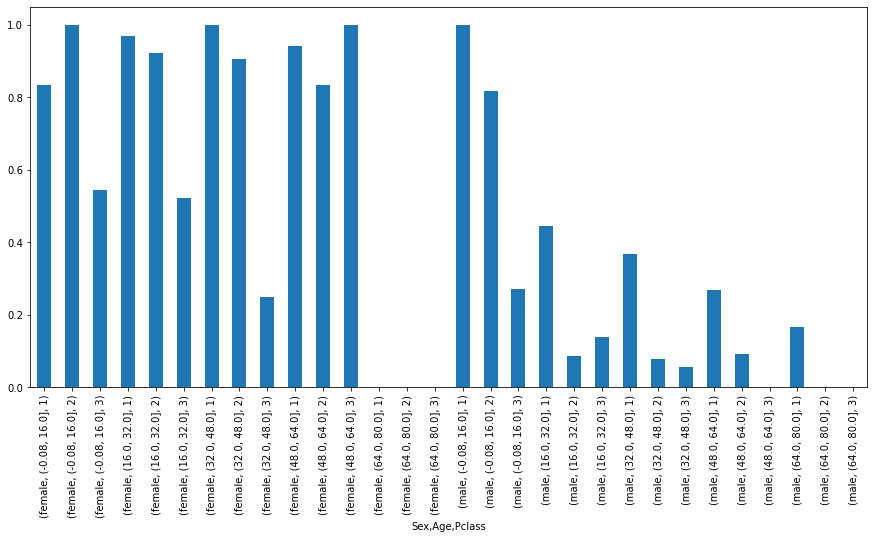

In [49]:
titan.groupby(["Sex", "Age", "Pclass"])["Survived"].mean().plot(kind='bar', figsize=(15,7))

In [51]:
# let's try something else, just to see what else we might do with groupby()
display(titan.groupby(["Sex", "Pclass", "Age"])["Pclass"].count().unstack())

Age            (-0.08, 16.0]  (16.0, 32.0]  (32.0, 48.0]  (48.0, 64.0]  \
Sex    Pclass                                                            
female 1                   6            32            39            17   
       2                  10            39            21             6   
       3                  33            94            16             1   
male   1                   3            27            60            26   
       2                  11            58            26            11   
       3                  37           245            54             8   

Age            (64.0, 80.0]  
Sex    Pclass                
female 1                  0  
       2                  0  
       3                  0  
male   1                  6  
       2                  2  
       3                  3